In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
eq5d= pd.read_csv('rq1_cleaned_no_ae.csv')
scores=pd.read_excel('../data/Scores 6 Jan 2025_Prescribed_Completed Baseline PROMs.xlsx')

In [3]:
gad7=scores[scores['promName']=='GAD7']
gad7=gad7[['SID','Round','promName','total_score','completionDate']]


gad7_wide = gad7.pivot_table(index='SID', 
                                    columns='Round', 
                                    values='total_score', 
                                    aggfunc='first')

gad7_wide.columns = [f"GAD7_Round{r}" for r in gad7_wide.columns]
gad7_wide = gad7_wide.reset_index()

In [18]:
gad7_wide['SID'].nunique()

31472

In [4]:
df= pd.merge(eq5d, gad7_wide, on='SID', how='left')

In [5]:
df.shape

(20593, 122)

In [21]:
print(df.isna().sum().sort_values(ascending=False).to_string())


GAD7_Round13                                             20591
GAD7_Round12                                             20575
GAD7_Round11                                             20562
GAD7_Round10                                             20553
GAD7_Round9                                              20212
GAD7_Round8                                              19509
GAD7_Round7                                              18129
EQ5D_Round6                                              16298
GAD7_Round6                                              16295
EQ5D_Round5                                              13161
GAD7_Round5                                              13158
EQ5D_Round4                                               8464
GAD7_Round4                                               8456
EQ5D_Round3                                               4279
GAD7_Round3                                               4267
GAD7_Round2                                            

In [22]:
df.columns.tolist()

['SID',
 'EQ5D_Round1',
 'EQ5D_Round2',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'Age',
 'Sex',
 'occupation',
 'weight',
 'height',
 'Myocardial_infarction',
 'Congestive_heart_failure',
 'Peripheral_vascular_disease',
 'Cerebrovascular_accident_or_transient_ischemic_attack',
 'Dementia',
 'Chronic_obstructive_pulmonary_disease',
 'Connective_tissue_disease',
 'Peptic_Ulcer_Disease',
 'Liver_disease',
 'Diabetes',
 'Hemiplegia',
 'Moderate_to_severe_chronic_kidney_disease',
 'Solid_tumour',
 'Leukemia',
 'Lymphoma',
 'AIDS',
 'Charlson_comorbidity',
 'Hypertension',
 'Depression_or_anxiety',
 'Arthritis',
 'Epilepsy',
 'VTE',
 'Endocrine_thyroid_dysfunction',
 'Allergy',
 'Smoking_status',
 'Smoking_pack_years',
 'alcohol_units',
 'Cannabis_status',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round1',
 'diag_Depression',
 'diag_Anxiety',
 'diag_Chronic pain',
 'diag_Osteoarthritis',
 'diag_PTSD',
 'diag_Fibromyalgia',
 'diag_Multiple sclerosis',
 'diag_Neuropat

Prediction (Random Forest)

In [6]:
df.columns.tolist()
df=df.rename(columns={'GAD7_Round1_y': 'GAD7_Round1',})

In [10]:
df.columns.tolist()

['SID',
 'EQ5D_Round1',
 'EQ5D_Round2',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'Age',
 'Sex',
 'occupation',
 'weight',
 'height',
 'Myocardial_infarction',
 'Congestive_heart_failure',
 'Peripheral_vascular_disease',
 'Cerebrovascular_accident_or_transient_ischemic_attack',
 'Dementia',
 'Chronic_obstructive_pulmonary_disease',
 'Connective_tissue_disease',
 'Peptic_Ulcer_Disease',
 'Liver_disease',
 'Diabetes',
 'Hemiplegia',
 'Moderate_to_severe_chronic_kidney_disease',
 'Solid_tumour',
 'Leukemia',
 'Lymphoma',
 'AIDS',
 'Charlson_comorbidity',
 'Hypertension',
 'Depression_or_anxiety',
 'Arthritis',
 'Epilepsy',
 'VTE',
 'Endocrine_thyroid_dysfunction',
 'Allergy',
 'Smoking_status',
 'Smoking_pack_years',
 'alcohol_units',
 'Cannabis_status',
 'GAD7_Round1_x',
 'insomniaEfficacyMeasure_Round1',
 'diag_Depression',
 'diag_Anxiety',
 'diag_Chronic pain',
 'diag_Osteoarthritis',
 'diag_PTSD',
 'diag_Fibromyalgia',
 'diag_Multiple sclerosis',
 'diag_Neuropat

In [7]:
drop= ['GAD7_Round3', 'GAD7_Round4', 'GAD7_Round5', 'GAD7_Round6', 'GAD7_Round7', 'GAD7_Round8','EQ5D_Round2','EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',]

df_dropped = df.drop(columns=drop, axis=1)


In [ ]:

df_cleaned= df_dropped[df_dropped['GAD7_Round2'].notnull()] 
full=df_cleaned.copy()


In [9]:
X=full.drop(['GAD7_Round2','SID'], axis=1)
y=full['GAD7_Round2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
rf = RandomForestRegressor(n_estimators=2000, max_depth=5, random_state=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")


Test MSE: 20.349
Test R²: 0.296


In [22]:
## Grid Search for Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [2, 5, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 3]
}

rf = RandomForestRegressor(random_state=100)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2', 
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 4.5min
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=500; total time= 4.8min
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=500; total time= 5.0min
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 5.1min
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 5.3min
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 5.3min
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 5.4min
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 5.6min
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 5.8min
[CV] END max_depth=2, min_samples_l

XGBoost

In [13]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [14]:
y_pred = xgb_reg.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.2967921722993877
RMSE: 20.322955037279282


Linear to Neural Network Prediction

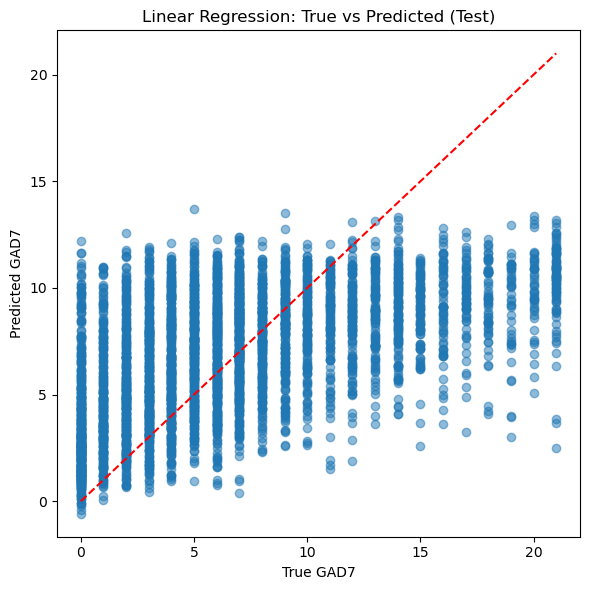

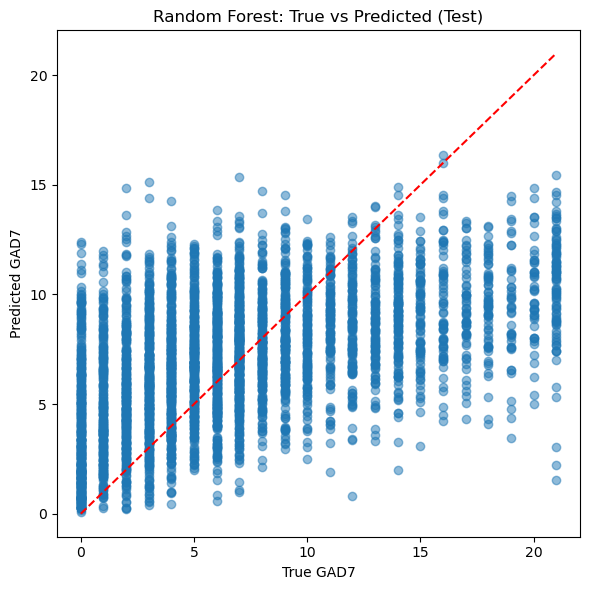

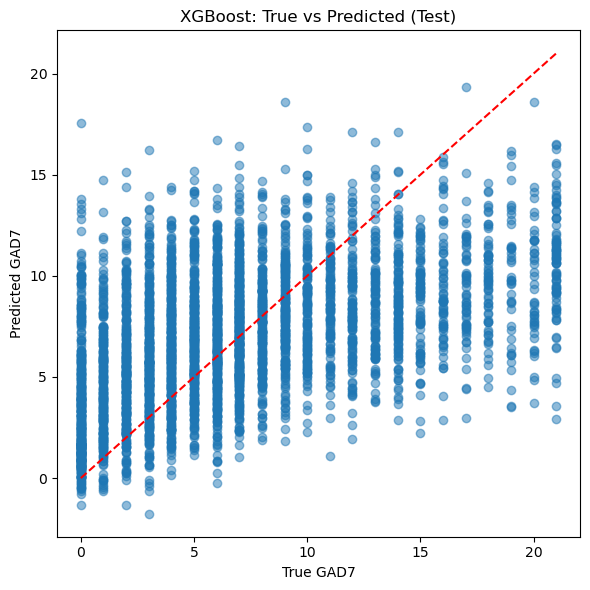

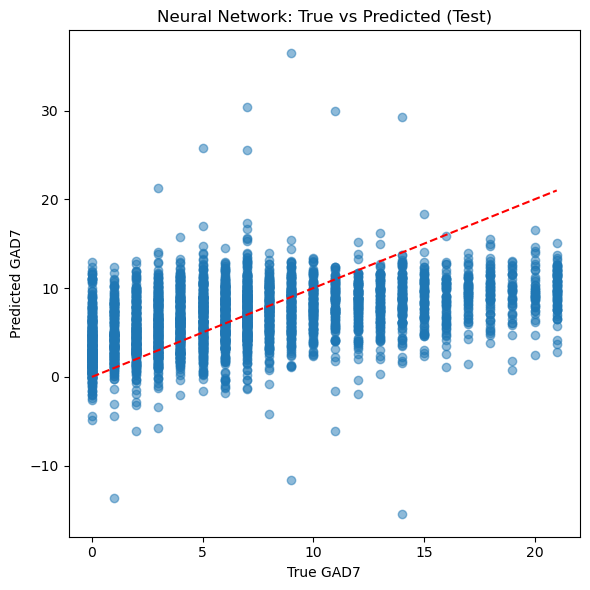


=== Model Performance ===
               Model  MSE Train   MSE Test  R2 Train   R2 Test
0  Linear Regression  20.134790  20.334624  0.300962  0.296388
1      Random Forest   2.940736  20.709005  0.897904  0.283434
2            XGBoost  10.059859  21.634880  0.650743  0.251397
3     Neural Network  22.623307  23.895130  0.214566  0.173189


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Data Preparation
df=df.rename(columns={'GAD7_Round1_y': 'GAD7_Round1',})

drop= [ 'GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13', 
 'EQ5D_Round2',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6']

df_dropped = df.drop(columns=drop, axis=1)

df_cleaned= df_dropped[df_dropped['GAD7_Round2'].notnull()]

full=df_cleaned.copy()
X=full.drop(['GAD7_Round2','SID'], axis=1)
y=full['GAD7_Round2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

# 6️⃣ Loop: Train, predict, evaluate, plot
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results.append({
        'Model': name,
        'MSE Train': mse_train,
        'MSE Test': mse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test
    })

    # Plot: True vs Predicted (Test)
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('True GAD7')
    plt.ylabel('Predicted GAD7')
    plt.title(f"{name}: True vs Predicted (Test)")
    plt.tight_layout()
    plt.show()

# results df
results_df = pd.DataFrame(results)
print("\n=== Model Performance ===")
print(results_df)

Grid Search

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Data Preparation
df=df.rename(columns={'GAD7_Round1_y': 'GAD7_Round1',})

drop= [ 'GAD7_Round3',
 'GAD7_Round4',
 'GAD7_Round5',
 'GAD7_Round6',
 'GAD7_Round7',
 'GAD7_Round8',
 'GAD7_Round9',
 'GAD7_Round10',
 'GAD7_Round11',
 'GAD7_Round12',
 'GAD7_Round13', 
 'EQ5D_Round2',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6']

df_dropped = df.drop(columns=drop, axis=1)

df_cleaned= df_dropped[df_dropped['GAD7_Round2'].notnull()]

full=df_cleaned.copy()
X=full.drop(['GAD7_Round2','SID'], axis=1)
y=full['GAD7_Round2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001]
    },
    'Ridge': {
        'alpha': [0.1, 1, 10]
    },
    'Lasso': {
        'alpha': [0.01, 0.1, 1]
    }
}


base_models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000),
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=10000),
    'Linear Regression': LinearRegression()
}


results = {}

for name, model in base_models.items():
    print(f"Running {name}...")
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        # For Linear Regression: no grid search
        model.fit(X_train, y_train)
        best_model = model
        best_params = 'N/A'

    # Evaluate on Train
    y_train_pred = best_model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Evaluate on Test
    y_test_pred = best_model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results[name] = {
        'Best Params': best_params,
        'MSE Train': mse_train,
        'MSE Test': mse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test
    }

results_df = pd.DataFrame(results).T  # Transpose for readability
print("\n=== GridSearch Performance ===")
print(results_df)

Running Random Forest...
Running XGBoost...
Running Neural Network...
Running Ridge...
Running Lasso...
Running Linear Regression...

=== GridSearch Performance ===
                                                         Best Params  \
Random Forest      {'max_depth': 5, 'min_samples_split': 5, 'n_es...   
XGBoost            {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
Neural Network     {'activation': 'relu', 'alpha': 0.001, 'hidden...   
Ridge                                                  {'alpha': 10}   
Lasso                                                {'alpha': 0.01}   
Linear Regression                                                N/A   

                   MSE Train   MSE Test  R2 Train   R2 Test  
Random Forest      19.864884  20.354292  0.310332  0.295708  
XGBoost            19.066872  20.028949  0.338038  0.306965  
Neural Network     25.231919  26.021383     0.124  0.099617  
Ridge              20.142363  20.310694  0.300699  0.297216  
Lasso               

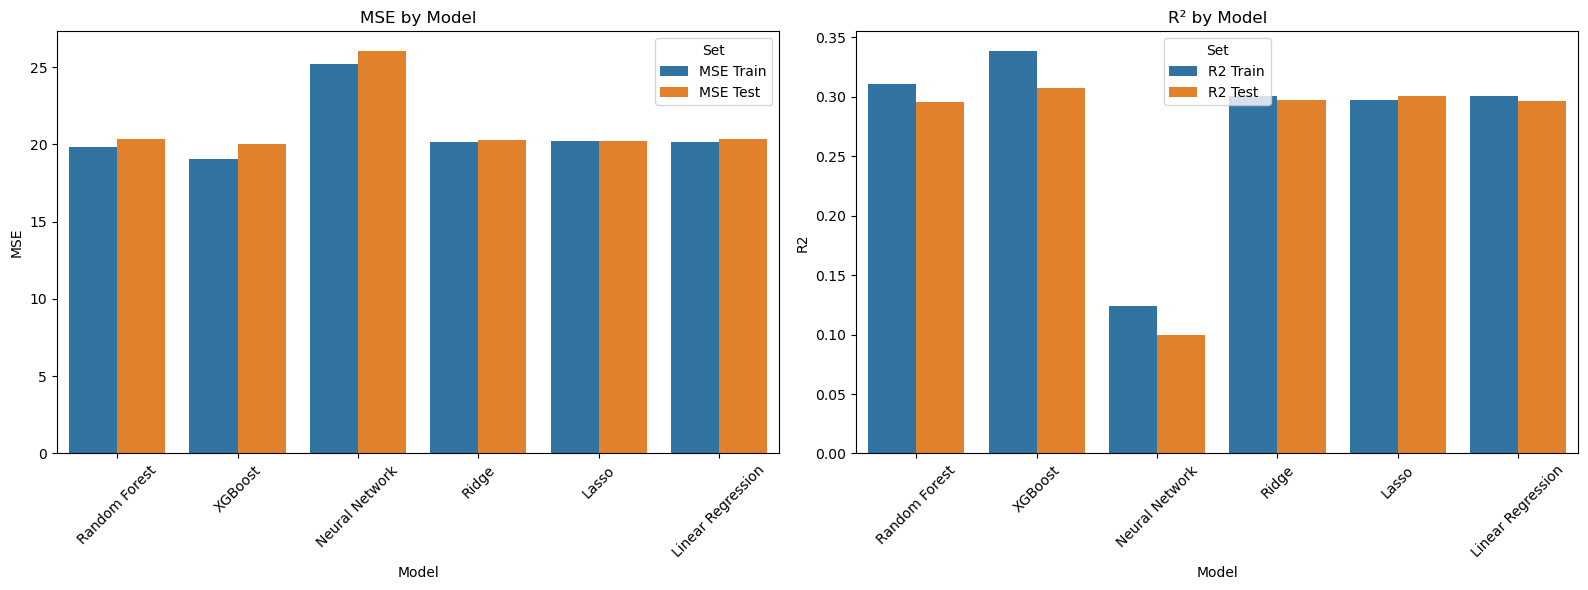

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


mse_df = results_df.reset_index().melt(
    id_vars='index',
    value_vars=['MSE Train', 'MSE Test'],
    var_name='Set',
    value_name='MSE'
)
mse_df = mse_df.rename(columns={'index': 'Model'})


r2_df = results_df.reset_index().melt(
    id_vars='index',
    value_vars=['R2 Train', 'R2 Test'],
    var_name='Set',
    value_name='R2'
)
r2_df = r2_df.rename(columns={'index': 'Model'})

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# MSE plot
sns.barplot(data=mse_df, x='Model', y='MSE', hue='Set', ax=axes[0])
axes[0].set_title('MSE by Model')
axes[0].tick_params(axis='x', rotation=45)

# R² plot
sns.barplot(data=r2_df, x='Model', y='R2', hue='Set', ax=axes[1])
axes[1].set_title('R² by Model')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



XGBoost Grid Search

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Load data
df = pd.read_csv('rq1_cleaned_adverse_severe.csv')

# Drop unwanted columns
drop = ['EQ5D_Round2', 'EQ5D_Round3', 'EQ5D_Round4', 'EQ5D_Round5', 'EQ5D_Round6']
df = df.drop(columns=[col for col in drop if col in df.columns])

# 2️⃣ Split
X = df.drop(['GAD7', 'SID'], axis=1)
y = df['GAD7']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Define a **more detailed grid**
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# 4️⃣ Grid search with CV
grid_xgb = GridSearchCV(
    XGBRegressor(random_state=42, verbosity=0),
    param_grid_xgb,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1  # use all cores
)

print("Running thorough XGBoost grid search...")
grid_xgb.fit(X_train, y_train)

# 5️⃣ Best params & evaluation
print("\n✅ Best XGBoost Params:", grid_xgb.best_params_)

best_xgb = grid_xgb.best_estimator_

y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n=== XGBoost Performance ===")
print(f"Train MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")
